In [1]:
from edgar_prelim import *
import pandas as pd
%load_ext autoreload
%autoreload 2
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
cik='0000004962'

In [3]:
# Parameters
cik = "0001011659"


# Company

In [4]:
cik_df = pd.read_sql(text("select cik, sic, sic_description, company_name, ticker from cik where cik = :cik").bindparams(cik=cik), prelim_engine)
cik_df.rename({'cik': 'CIK', 'sic': 'SIC', 'sic_description': 'Description', 'company_name': 'Name', 'ticker': 'Ticker'}, axis=1).T.rename({0: ''}, axis=1)

,
CIK,0001011659
SIC,6021
Description,NATIONAL COMMERCIAL BANKS
Name,MUFG Americas Holdings Corp
Ticker,UB


In [5]:
prelims = query_prelims(cik)

# Summary Statistics

In [6]:
prelims.groupby('item').item_value.describe()

,count,mean,std,min,25%,50%,75%,max
item,,,,,,,,
book value per share,4.0,3.403750e+01,3.751777e-01,33.5,3.395750e+01,3.414000e+01,3.422000e+01,3.437000e+01
interest income,40.0,7.882903e+08,9.415069e+07,689522000.0,7.154040e+08,7.680000e+08,8.130000e+08,1.083000e+09
net income,40.0,1.529119e+08,9.487479e+07,-85880000.0,1.193975e+08,1.677245e+08,2.057500e+08,3.340000e+08
net interest income,40.0,6.519646e+08,9.013203e+07,441039000.0,5.953978e+08,6.565000e+08,7.072500e+08,8.160000e+08
provision for loan losses,40.0,4.950000e+07,1.065263e+08,-102000000.0,-1.600000e+07,8.500000e+06,7.850000e+07,3.600000e+08
total revenue,40.0,9.355306e+08,2.013674e+08,656552000.0,7.899248e+08,8.675000e+08,1.092750e+09,1.418000e+09


# Plots

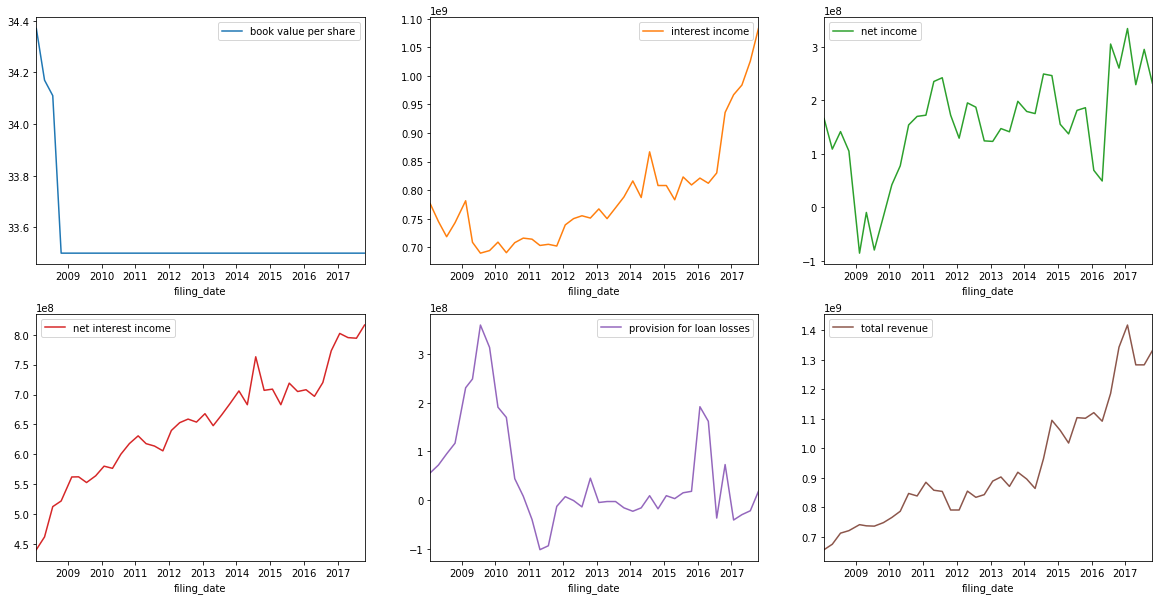

In [7]:
_ = prelims.set_index('filing_date').pivot(columns='item', values='item_value').fillna(method="ffill").plot(subplots=True, layout=(2, 3), figsize=(20, 10), sharex=False)

# Quality

In [8]:
validate_prelims(prelims)

,,period,msg_type,message
cik,item,,,
0001011659,book value per share,2008Q4 to 2017Q3: 36 periods,missing,Missing period


# Data

In [9]:
def make_clickable(val: str) -> str: 
    if isinstance(val, str):
        name, url = val.split('#')
        return f'<a href="{url}">{name}</a>'
    else:
        return ''

(prelims
 .assign(fiscal_period = prelims.fiscal_period.str.cat(prelims.filing_href, sep='#'), filing_date = prelims.filing_date.map(lambda d: d.strftime('%Y-%m-%d')))
 .loc[:, ['filing_date', 'fiscal_period', 'item', 'item_value', 'src_table', 'src_row', 'src_column', 'src_value', 'src_units']]
 .set_index(['filing_date', 'item'])
 .style.format({'fiscal_period': make_clickable})
)

In [10]:
#discard_prelim(cik, date(2019, 12, 31))
#force_reload_prelim(cik, date(2019, 12, 31), delete_filings=False)
#force_reload_prelim_between(cik,  start=date(2002, 6, 1), end=date(2019, 12, 31), delete_filings=False)

In [11]:
#d = date(2018, 10, 29)
#extract_prelim_statements(cik, start=d, end=d)

In [12]:
#d = date(2019, 4, 22)
#filings = query_edgar_for_filings(cik, "8-K", start=d, end=d, require_xbrl=False)
#report = query_edgar_for_submission_text(filings[0].href)
#submission = load_submission(report.href)
#tables = list(parse_tables(submission))
#items_from_tables(tables)

In [13]:
#widget = query_prelims_for_override(cik, filing_date='2006-01-27', item=None)
#widget

In [14]:
#widget.save()